### Initialization

In [1]:
# import matplotlib
# matplotlib.use("Agg")
import pandas as pd
import mne
import numpy as np
from pathlib import Path
# %matplotlib qt

file_path = Path('./data/00003')
# raw = mne.io.read_raw_nihon(file_path/'CJ258289.EEG', preload=False, verbose=None)
events = pd.read_csv(file_path/'00003_events.txt',header=None)
psychopy_file = pd.read_csv(file_path/'00003_crop_psychopy.csv')
raw_origin = mne.io.read_raw_edf(file_path/'00003.edf', preload=True, verbose=None)
# raw.info['sfreq']
# raw.get_channel_type
deviation = float(events.loc[0][0])-float(psychopy_file.loc[0].at['trigger_on_time'])
deviation = round(float(deviation),3)

raw_origin.crop(tmin=deviation)


for row in range(events.shape[0]):
    events.loc[row,0] = round((float(events.loc[row,0]) - deviation),3)
    
events.to_csv(file_path/'00003_crop_events.txt', header=False, index=False)

raw = raw_origin.copy()
raw.filter(l_freq=0.1, h_freq=None)

raw.drop_channels(['E','EEG Mark1','EEG Mark2','Events/Markers','DC09','DC10',
                   'DC11','DC12','DC13','DC14','DC15','DC16'])

channel_mapping = {'A1':'Iz','A2':'Fp1','A3':'Fpz','A4':'Fp2','A5':'AF7','A6':'AF3','A7':'AFz',
                   'A8':'AF4','A9':'AF8','A10':'F7','A11':'F5','A12':'F3','A13':'F1',
                   'A14':'Fz','A15':'F2','A16':'F4','A17':'F6','A18':'F8','A19':'FT7',
                   'A20':'FC5','A21':'FC3','A22':'FC1','A23':'FCz','A24':'FC2',
                   'A25':'FC4','A26':'FC6','A27':'FT8','A28':'T7','A29':'C5','A30':'C3',
                   'A31':'C1','A32':'Cz','A33':'C2','A34':'C4','A35':'C6','A36':'T8',
                   'A37':'TP7','A38':'CP5','A39':'CP3','A40':'CP1','A41':'CPz','A42':'CP2',
                   'A43':'CP4','A44':'CP6','A45':'TP8','A46':'P7','A47':'P5','A48':'P3',
                   'A49':'P1','A50':'Pz','A51':'P2','A52':'P4','A53':'P6','A54':'P8',
                   'A55':'PO7','A56':'PO3','A57':'POz','A58':'PO4','A59':'PO8',
                   'A60':'O1','A61':'Oz','A62':'O2'}
raw.rename_channels(channel_mapping)
raw.pick(picks='eeg',exclude=['Iz'])

# Initialize events and annotations
annotations = events
onset = []
duration = []
description = []
# print(annotations)
for row in range(annotations.shape[0]):
#     print(annotations.loc[row,0])
    onset.append(float(annotations.loc[row,0]))
    if annotations.loc[row,1]==1:
        duration.append(1)
        if psychopy_file.loc[row]['like_slider.response']==0:
            description.append('dislike')
        elif psychopy_file.loc[row]['like_slider.response']==1:
            description.append('like')
    elif annotations.loc[row,1]==3:
        duration.append(5)
        if psychopy_file.loc[row]['buy_slider.response']==0:
            description.append('not_buy')
        elif psychopy_file.loc[row]['buy_slider.response']==1:
            description.append('buy')
        
annot = mne.Annotations(onset=onset,duration=duration,description=description)
raw.set_annotations(annot)

custom_mapping = {'dislike': 1, 'like': 2,'not_buy':3,'buy':4}
events_from_annot, event_dict = mne.events_from_annotations(raw)

# Init reference channel: I use A11:F5, A12:F3
raw.set_eeg_reference(ref_channels='average',ch_type='eeg')

# Init EOG
raw.set_channel_types({'A63':'eog','A64':'eog'})

# Init montage
easycap_montage = mne.channels.make_standard_montage('biosemi64')
raw.set_montage(easycap_montage)



# raw.info
# raw.ch_names
# print(event_dict)
# print(events_from_annot[:5])
# raw.plot(start=295, duration=50)
# raw.plot_sensors(show_names=True)
# psychopy_file.loc[:,'trigger_on_time']
# psychopy_file.loc[0]['trigger_on_time']

Extracting EDF parameters from /home/yossi/Documents/Project/My_exp/data/00003/00003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1613799  =      0.000 ...  1613.799 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Used Annotations descriptions: ['buy', 'dislike', 'like', 'not_buy']
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    1.5s finished


<RawEDF | 00003.edf, 63 x 1515657 (1515.7 s), ~728.6 MB, data loaded>

Using matplotlib as 2D backend.


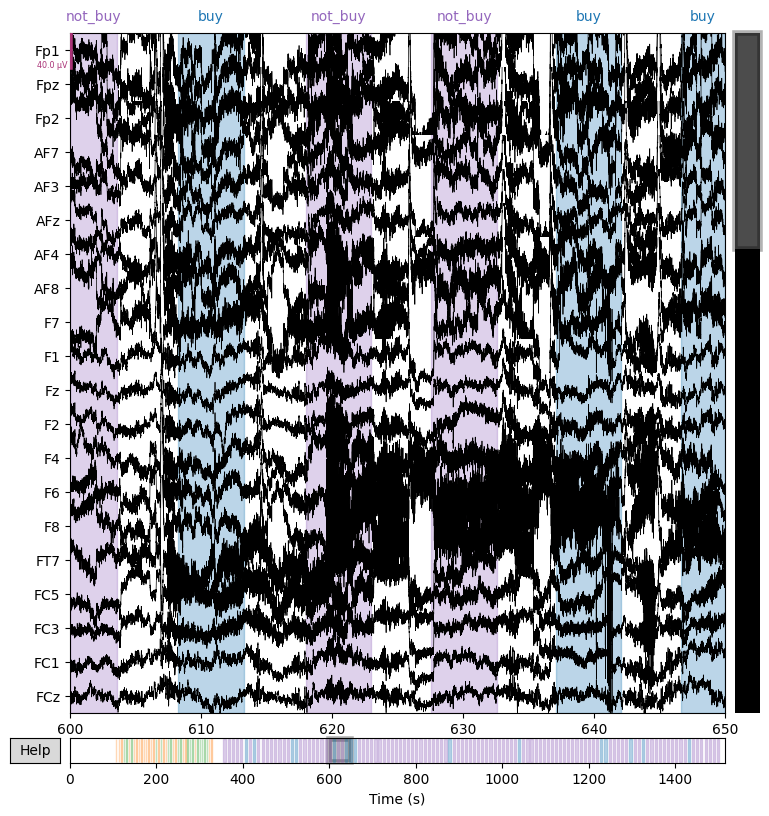

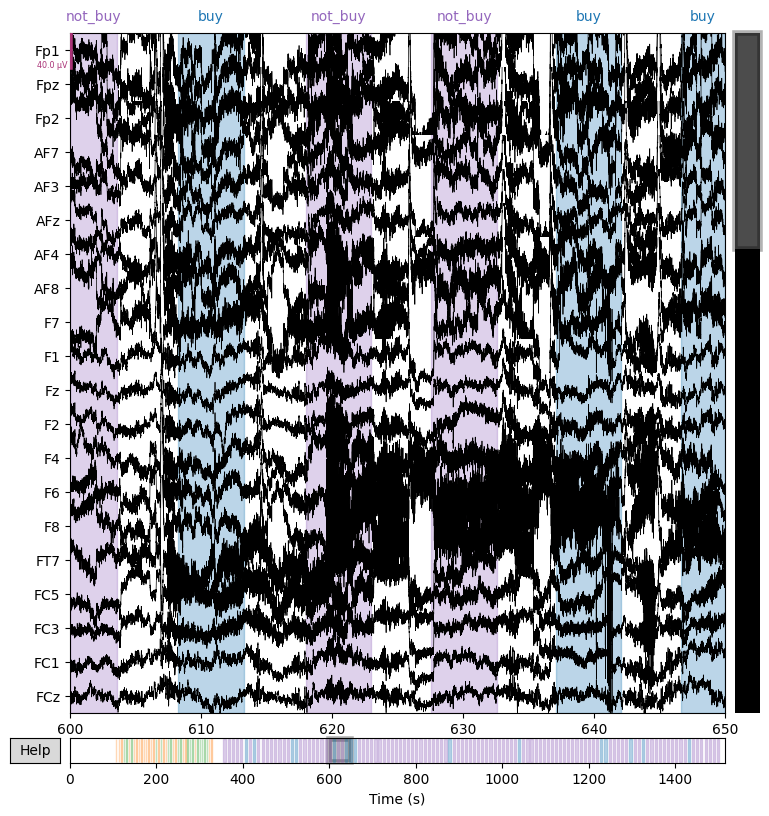

In [2]:
raw.plot(start=600, duration=50)

In [3]:
# import pandas as pd
# import mne
# import numpy as np
# from pathlib import Path

# subj_path = Path('./data/00001')

# # Read files
# raw_origin = mne.io.read_raw_edf(subj_path/'00001.edf')
# events_origin = pd.read_csv(subj_path/'00001_crop_events.txt',header=None)
# psychopy_origin = pd.read_csv(subj_path/'00001_psychopy.csv')
# # print(events_origin, psychopy_origin.shape)


### Reduce EOG

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.


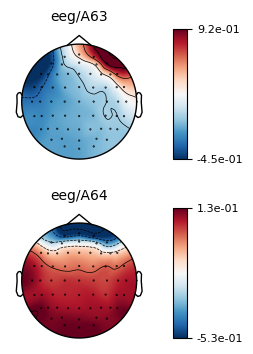

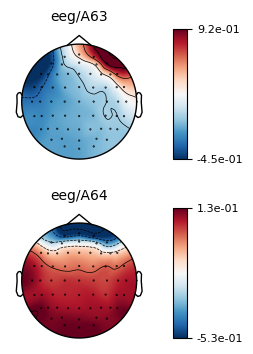

In [4]:
# result = mne.find_stim_steps(raw, 
#                              stim_channel=['DC09','DC10'],
#                             merge=3)

# result
# Fit the regression model
from mne.preprocessing import EOGRegression
from matplotlib import pyplot as plt

weights = EOGRegression().fit(raw)
raw_clean = weights.apply(raw, copy=True)

# Show the filter weights in a topomap
weights.plot()
# raw_clean.pick([''])

### Epochs

Not setting metadata
160 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 5201 original time points ...
0 bad epochs dropped


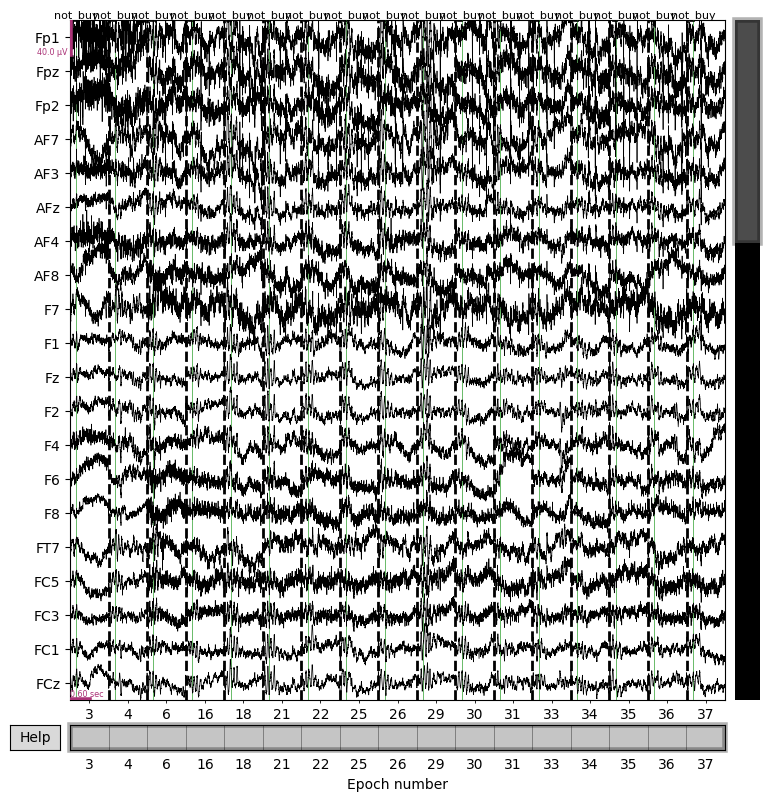

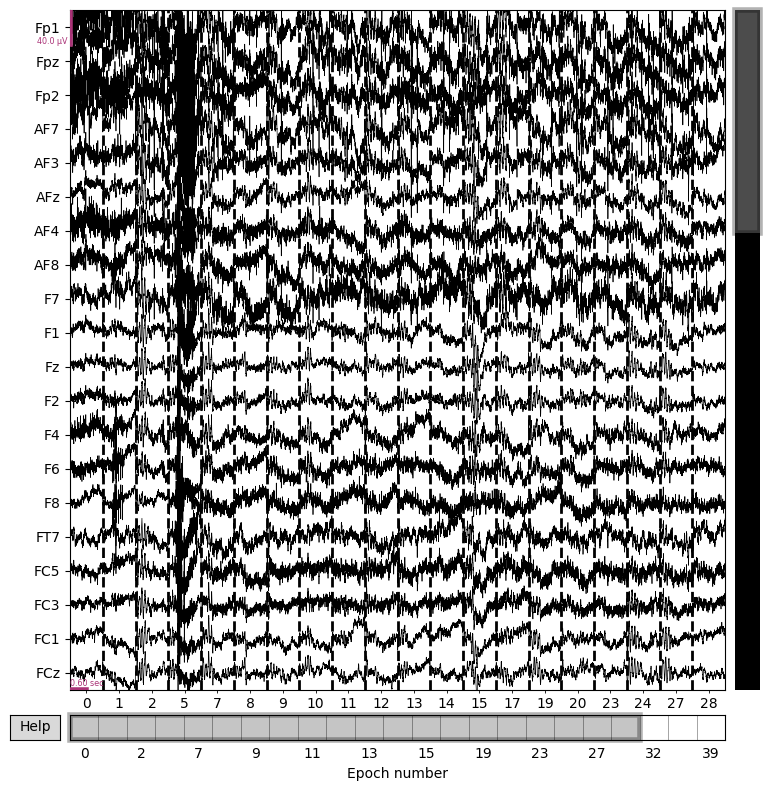

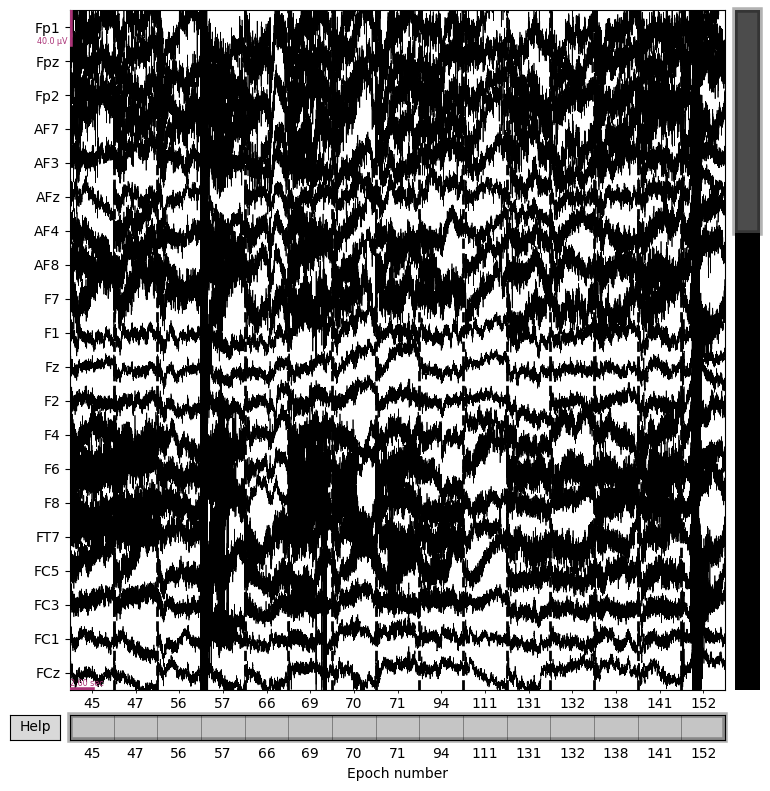

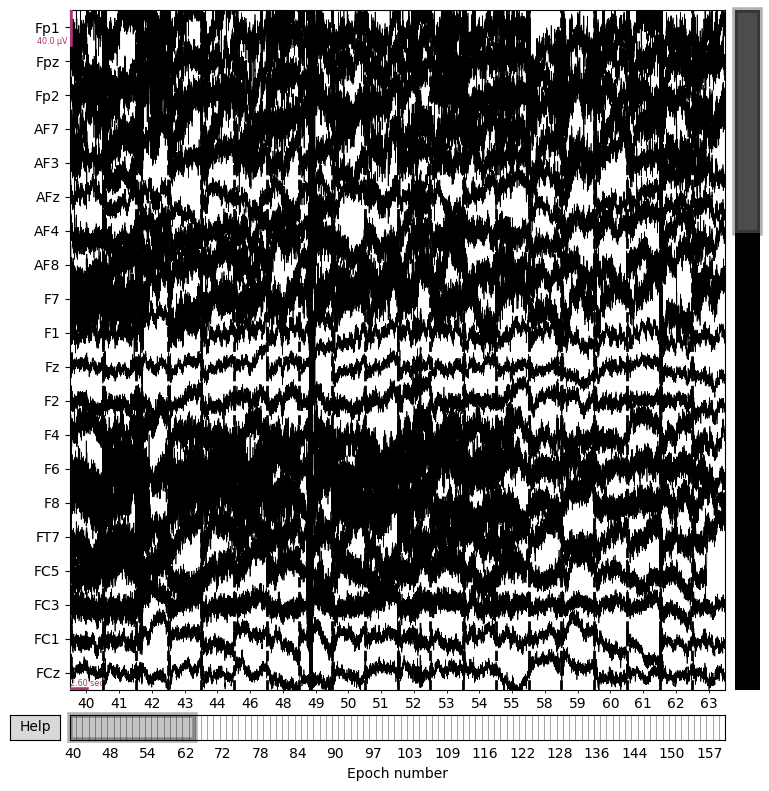

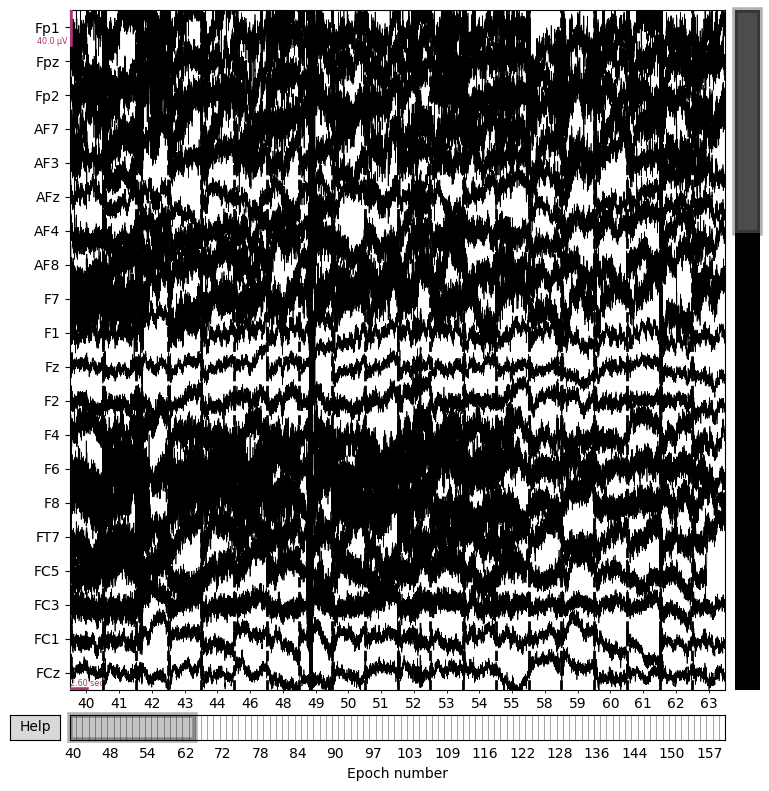

In [13]:

epochs = mne.Epochs(raw_clean, events_from_annot, tmin=-0.2, tmax=5, event_id=event_dict,
                    preload=True)

epoch_like = epochs['like'].crop(tmin=-0.2, tmax=1)
epoch_like.plot(events=events_from_annot,event_id=custom_mapping)
epoch_dislike = epochs['dislike'].crop(tmin=-0.2, tmax=1)
epoch_dislike.plot()
epoch_buy = epochs['buy'].crop(tmin=-0.2, tmax=5)
epoch_buy.plot()
epoch_notbuy = epochs['not_buy'].crop(tmin=-0.2, tmax=5)
epoch_notbuy.plot()

    Using multitaper spectrum estimation with 7 DPSS windows


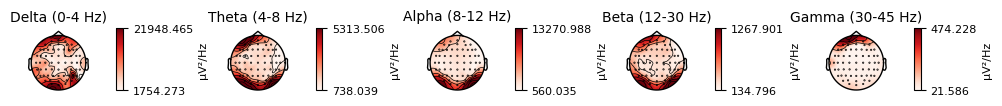

In [6]:
epoch_like.compute_psd(n_jobs=-1).plot_topomap().savefig('./00003_epoch_like.png')
# epoch_like.compute_psd().plot_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


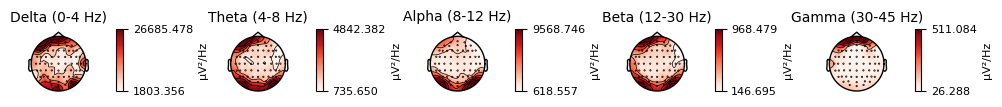

In [7]:
epoch_dislike.compute_psd(n_jobs=-1).plot_topomap().savefig('./00003_epoch_dislike.png')
# epoch_dislike.compute_psd().plot_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


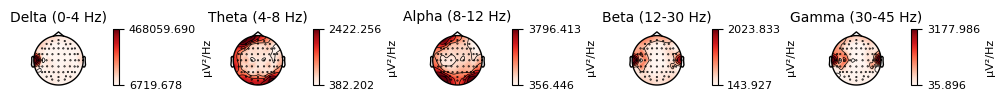

In [11]:
epoch_buy.compute_psd(n_jobs=-1).plot_topomap().savefig('./00003_epoch_buy.png')
# epoch_buy.compute_psd().plot_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


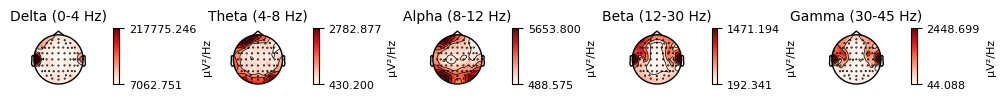

In [9]:
epoch_notbuy.compute_psd(n_jobs=-1).plot_topomap().savefig('./00003_epoch_notbuy.png')
# epoch_notbuy.compute_psd().plot_topomap()

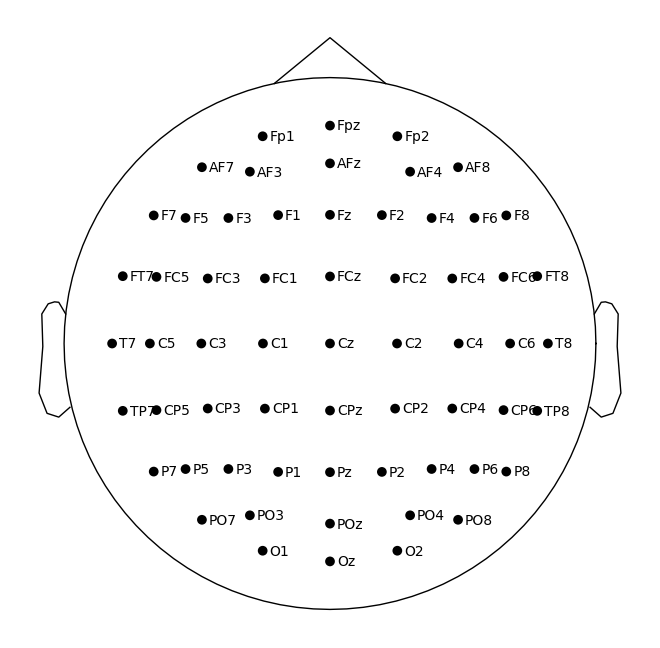

In [10]:
raw.plot_sensors(show_names=True).savefig('./00003_montage.png')